In [1]:
#Imports
import librosa
import numpy as np
import Models #Our models
import LoadAndPreprocessDataset


categories=['yes','no','up','down','left','right','on','off','stop','go']
#categories=['yes','no','up','down','left','right','on','off','stop','go','zero','one','two','three','four','five','six','seven','eight','nine','unknown']
nCategories=len(categories)
nTestSamples=3000 #3k, 11k

In [2]:
#Load filenames
train,val,test = LoadAndPreprocessDataset.loadDatasetFilenames(nCategories=nCategories)

#Load TEST file
X,y_test=LoadAndPreprocessDataset.loadBatch(test,batch_size=nTestSamples, nCategories=nCategories)
#Preprocess TEST
#X_test=LoadAndPreprocessDataset.MFCC_DELTA(X,n_mfcc=40)
#X_test=LoadAndPreprocessDataset.MFCC(X,n_mfcc=40)
#X_test=LoadAndPreprocessDataset.melspect(X)
#X_test=X

X_test_1=LoadAndPreprocessDataset.melspect(X)
X_test_2=LoadAndPreprocessDataset.MFCC(X,n_mfcc=40)

#ADD extra dimension for CNN
X_test_1 = X_test_1[..., np.newaxis]
X_test_2 = X_test_2[..., np.newaxis]
X=X[..., np.newaxis]

In [5]:
#load model

#10 command
save_name_1="2020-07-25_13-50_DSConvModel" #MEL
save_name_2="2020-07-24_16-57_DSConvModel" #MFCC
save_name_3="2020-07-23_13-11_DirectCNNBatchDrop" #RAW
save_name_4="2020-07-29_16-51_DSConvModelMedium" #MEL
save_name_5="2020-07-25_11-22_DSConvModelMedium" #MFCC
save_name_6="2020-07-29_15-42_DSConvModelSmall" #MEL
save_name_7="2020-07-25_10-30_DSConvModelSmall" #MFCC

#21 command
'''save_name_1="2020-07-25_13-50_DSConvModel" #MEL
save_name_2="2020-07-24_16-57_DSConvModel" #MFCC
save_name_3="2020-07-23_13-11_DirectCNNBatchDrop" #RAW
save_name_4="2020-07-29_16-51_DSConvModelMedium" #MEL
save_name_5="2020-07-25_11-22_DSConvModelMedium" #MFCC
save_name_6="2020-07-29_15-42_DSConvModelSmall" #MEL
save_name_7="2020-07-25_10-30_DSConvModelSmall" #MFCC'''

from tensorflow.keras.models import load_model
model_1 = load_model('models/'+save_name_1+'.h5')
model_2 = load_model('models/'+save_name_2+'.h5')
model_3 = load_model('models/'+save_name_3+'.h5')
model_4 = load_model('models/'+save_name_4+'.h5')
model_5 = load_model('models/'+save_name_5+'.h5')
model_6 = load_model('models/'+save_name_6+'.h5')
model_7 = load_model('models/'+save_name_7+'.h5')

# Test the model on test data
y_pred_1=model_1.predict(X_test_1)
y_pred_2=model_2.predict(X_test_2)
y_pred_3=model_3.predict(X)
y_pred_4=model_4.predict(X_test_1)
y_pred_5=model_5.predict(X_test_2)
y_pred_6=model_6.predict(X_test_1)
y_pred_7=model_7.predict(X_test_2)

mean=(y_pred_1+y_pred_2+y_pred_3+y_pred_4+y_pred_5+y_pred_6+y_pred_7)/7
mean=(y_pred_1+y_pred_2)/2
y_pred=np.argmax(mean,1)


Test accuracy:	 0.966
Precision:	 0.966
Recall:		 0.966
F1:		 0.966


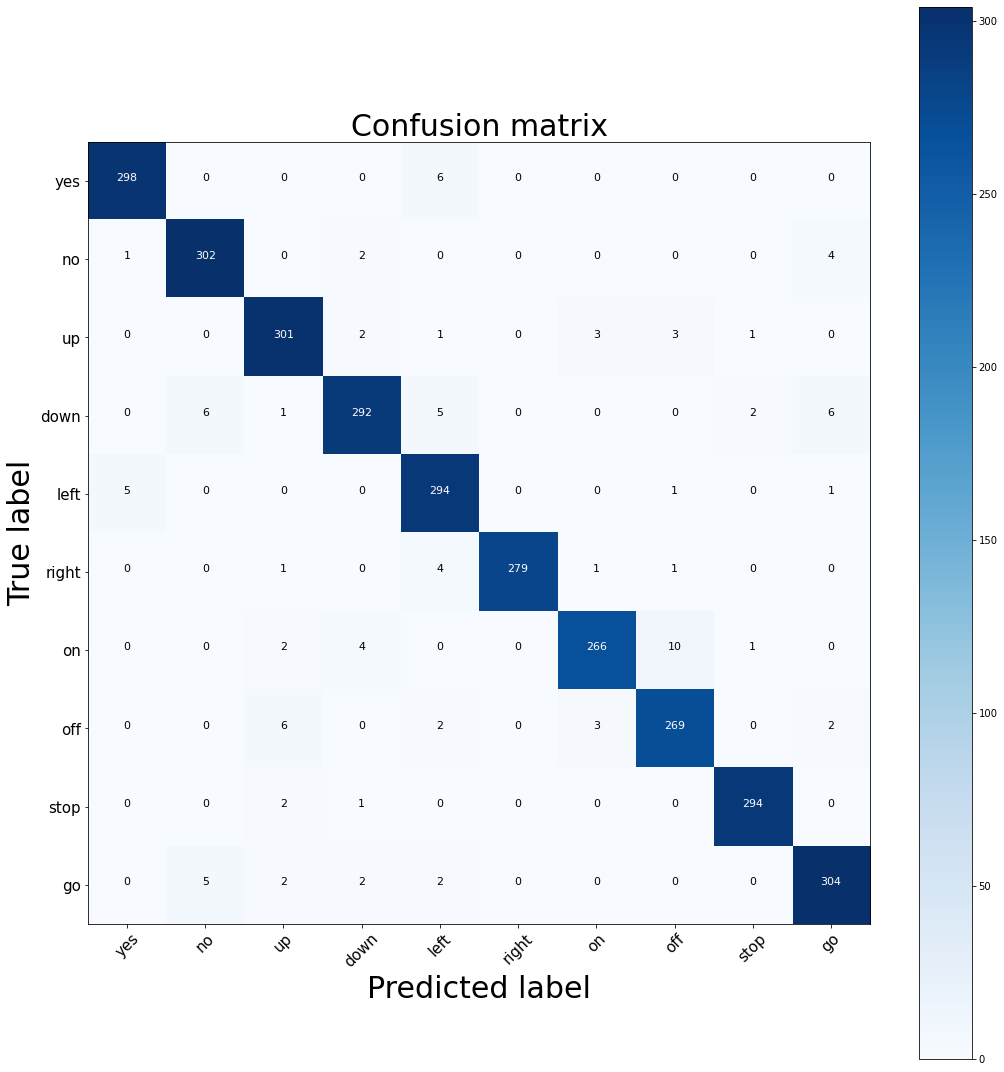

In [6]:
import datetime
modelName="Ensemble"+str(nCategories)
save_name=datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")+"_"+modelName
save_dir="output/"+save_name+"_"

from sklearn.metrics import accuracy_score
print('Test accuracy:\t', round(accuracy_score(y_test, y_pred),3))


# Precision and Recall(sensitivity/true positive rate)
from sklearn.metrics import precision_score, recall_score
prec=precision_score(y_test, y_pred,average='micro')
rec=recall_score(y_test, y_pred,average='micro')

#F1 - high if both recall and precision are high.
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred,average='micro')

print("Precision:\t",round(prec,3))
print("Recall:\t\t",round(rec,3))
print("F1:\t\t",round(f1,3))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import audioUtils
audioUtils.plot_confusion_matrix(cm,categories, normalize=False,save_path=save_dir)